### Analysis of IMDB  useful libraries with sql

Database Contains Two Tables. The First Table Is Called 'directors', Contains The Name Of The Director And His Gender. The Second Table Is Called 'movies', Contains The Title Of The Movies, budget, revenue, popularity, etc.

From This database, You Can Find Out The Best Movies Based On Income, Popularity And Votes. In Addition, You Can Also Find Out The Best Director Based On The Amount Of Revenue From All His Movies.

The Correlation Coefficient Of These Two Tables Can Show The Effect Of Each Column To The Other Column.

In [3]:
#import pandas and numpy

import numpy as np
import pandas as pd

#Importing libraries for ploting

import seaborn as sns
import matplotlib.pyplot as plt

#Supressing warnings
import warnings
warnings.filterwarnings('ignore')

#SQLite for sever-less database used with programing language
import sqlite3

After importing the SQLite module ,create a connection object to connect with the database which will let us execute the SQL statements

#### STEPS
> To query data in an SQLite database from Python, you use these steps:

- First, establish a connection to the SQLite database by creating a Connection object.
- Next, create a Cursor object using the cursor method of the Connection object.
- Then, execute a  SELECT statement.
- After that, call the fetchall() method of the cursor object to fetch the data.
- Finally, loop the cursor and process each row individually.

In [4]:
db="/content/drive/MyDrive/Colab Notebooks/archive/movies.sqlite"
con = sqlite3.connect(db)
cur = con.cursor()

Getting all the data about the movies

In [6]:
cur.execute("SELECT *  FROM movies")
#fetching all the records movies
movies = cur.fetchall()

#creating the dataframe containing rows and columns ,2d data
movies = pd.DataFrame(movies , columns = ['id', 'original_title', 'budget', 'popularity', 'release_date', 'revenue', 'title', 'vote_average', 'vote_count', 'overview', 'tagline', 'uid', 'director_id'])

print("Shape of movies data :" , movies.shape)
print("\n\n\n")
#display first 3 rows
movies.head(3)




Shape of movies data : (4773, 13)






,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4773 non-null   int64  
 1   original_title  4773 non-null   object 
 2   budget          4773 non-null   int64  
 3   popularity      4773 non-null   int64  
 4   release_date    4773 non-null   object 
 5   revenue         4773 non-null   int64  
 6   title           4773 non-null   object 
 7   vote_average    4773 non-null   float64
 8   vote_count      4773 non-null   int64  
 9   overview        4770 non-null   object 
 10  tagline         3951 non-null   object 
 11  uid             4773 non-null   int64  
 12  director_id     4773 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 484.9+ KB


Fetching all the data about the directors

In [9]:
cur.execute("SELECT * FROM directors")
directors = cur.fetchall()
directors = pd.DataFrame(directors , columns= ['name', 'id', 'gender', 'uid', 'department' ])
print("Sape of the Directors data :" , directors.shape)
print("\n\n\n")

directors.head(3)

Sape of the Directors data : (2349, 5)






,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing


In [10]:
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        2349 non-null   object
 1   id          2349 non-null   int64 
 2   gender      2349 non-null   int64 
 3   uid         2349 non-null   int64 
 4   department  2349 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.9+ KB


Count of movies present in IMBD 

In [11]:
cur.execute("SELECT COUNT(*) from movies")
count = cur.fetchall()
print("the number of movies presnet in imdb are: ", count[0])

the number of movies presnet in imdb are:  (4773,)


Directors with names :James Cameron ; Luc Besson ; John Woo

In [13]:
cur.execute("SELECT * FROM directors WHERE name=='James Cameron' and name=='Luc Besson' and name =='John Woo'")
three_directors = cur.fetchall()
three_directors = pd.DataFrame(three_directors , columns= ['name', 'id', 'gender', 'uid', 'department' ])
print( "The three directors are")

The three directors are


In [14]:

directors.head(3)

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing


All directors with the name strating with Steven

In [15]:
cur.execute("SELECT * FROM directors where name LIKE 'Steven%'")
name_like= cur.fetchall()
print(" the name straing with Steven  ", name_like )

 the name straing with Steven   [('Steven Spielberg', 4799, 2, 488, 'Directing'), ('Steven Soderbergh', 4909, 2, 1884, 'Directing'), ('Steven Brill', 5013, 2, 32593, 'Directing'), ('Steven Zaillian', 5117, 2, 2260, 'Directing'), ('Steven Quale', 5216, 2, 93214, 'Directing'), ('Steven Seagal', 5221, 2, 23880, 'Directing'), ('Steven E. de Souza', 5390, 2, 1726, 'Directing'), ('Steven Shainberg', 5803, 2, 67795, 'Directing'), ('Steven R. Monroe', 6713, 2, 88039, 'Directing')]


Count of female directors 

In [18]:
cur.execute("SELECT COUNT(*)  FROM directors WHERE gender==1")
female_directors= cur.fetchall()
print(" the number of female dirstors are : " , female_directors[0])


 the number of female dirstors are :  (150,)


Names of first 10 women directors

In [27]:
cur.execute("SELECT name FROM directors WHERE gender==1 ORDER BY id asc limit  10")
ten =cur.fetchall()
print("Names of first 10 women directors \n", ten)

Names of first 10 women directors 
 [('Brenda Chapman',), ('Lilly Wachowski',), ('Jennifer Yuh Nelson',), ('Kathryn Bigelow',), ('Nancy Meyers',), ('Jill Culton',), ('Mimi Leder',), ('Vicky Jenson',), ('Betty Thomas',), ('Angelina Jolie',)]


3 most popular movies

In [25]:
cur.execute("SELECT original_title FROM movies ORDER by popularity desc limit 3")
popular = cur.fetchall()
print("3 most popular movies are : " , popular)

3 most popular movies are :  [('Minions',), ('Interstellar',), ('Deadpool',)]


3 most bankable movies

In [30]:
cur.execute("SELECT original_title FROM movies ORDER by budget desc limit 3")
bankable = cur .fetchall()
print( " The three most bankable movies are \n\n\t:" , bankable)

 The three most bankable movies are 

	: [('Pirates of the Caribbean: On Stranger Tides',), ("Pirates of the Caribbean: At World's End",), ('Avengers: Age of Ultron',)]


Most awarded average vote since January 1st 2000

In [31]:
cur.execute("SELECT original_title  FROM  movies WHERE release_date > '2000-01-01' ORDER by vote_average DESC LIMIT 1")
most_awarded_average = cur.fetchall()
print("The most awarded average vote since the january 1st 2000 :\n\n\t",most_awarded_average)

The most awarded average vote since the january 1st 2000 :

	 [('Sardaarji',)]


Movie directed by Brenda Chapman

In [33]:
cur.execute(" SELECT original_title FROM movies JOIN directors ON directors.id == movies.director_id WHERE directors.name = 'Brenda Chapman'")
m = cur.fetchall()
print(" movies directed by Brenda Chapman \n\n\t :", m)

 movies directed by Brenda Chapman 

	 : [('Brave',)]


director who made most of the movies


In [35]:
cur.execute("SELECT name FROM directors JOIN movies ON directors.id =  movies.director_id GROUP BY director_id ORDER by COUNT(name) desc LIMIT 1")
dir = cur.fetchall()
print(" director who made most of the movies \n\n\t : ",dir)

 director who made most of the movies 

	 :  [('Steven Spielberg',)]


Director whose is most bankable

In [37]:
cur.execute("SELECT name FROM directors JOIN movies ON directors.id = movies.director_id  GROUP BY director_id ORDER by sum(budget) desc LIMIT 1")
bank = cur.fetchall()
print(" the director who is most bankble is \n\n\t : " , bank)

 the director who is most bankble is 

	 :  [('Steven Spielberg',)]


#Analysis on IMDB DATA SET

####BUDGET ANALYSIS

top 10 highest budget made movies

In [38]:
cur.execute("SELECT original_title , name ,release_date , budget , revenue FROM movies JOIN directors ON movies.director_id = directors.id ORDER by budget desc")
mostExpensive  = cur.fetchall()
mostExpensive = pd.DataFrame(mostExpensive , columns = ['original_title', 'director_name', 'release_date', 'budget', 'revenue'])
mostExpensive.head(10)

,original_title,director_name,release_date,budget,revenue
0,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,2011-05-14,380000000,1045713802
1,Pirates of the Caribbean: At World's End,Gore Verbinski,2007-05-19,300000000,961000000
2,Avengers: Age of Ultron,Joss Whedon,2015-04-22,280000000,1405403694
3,Superman Returns,Bryan Singer,2006-06-28,270000000,391081192
4,John Carter,Andrew Stanton,2012-03-07,260000000,284139100
5,Tangled,Byron Howard,2010-11-24,260000000,591794936
6,Spider-Man 3,Sam Raimi,2007-05-01,258000000,890871626
7,The Lone Ranger,Gore Verbinski,2013-07-03,255000000,89289910
8,The Dark Knight Rises,Christopher Nolan,2012-07-16,250000000,1084939099
9,Harry Potter and the Half-Blood Prince,David Yates,2009-07-07,250000000,933959197


#####Popularity Analysis
top 10 popular movies

In [39]:
cur.execute("SELECT original_title , name ,release_date , budget , revenue FROM movies JOIN directors ON movies.director_id = directors.id ORDER by popularity desc")
mostPopular  = cur.fetchall()
mostPopular = pd.DataFrame(mostExpensive , columns = ['original_title', 'director_name', 'release_date', 'budget', 'revenue'])
mostPopular.head(10)

,original_title,director_name,release_date,budget,revenue
0,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,2011-05-14,380000000,1045713802
1,Pirates of the Caribbean: At World's End,Gore Verbinski,2007-05-19,300000000,961000000
2,Avengers: Age of Ultron,Joss Whedon,2015-04-22,280000000,1405403694
3,Superman Returns,Bryan Singer,2006-06-28,270000000,391081192
4,John Carter,Andrew Stanton,2012-03-07,260000000,284139100
5,Tangled,Byron Howard,2010-11-24,260000000,591794936
6,Spider-Man 3,Sam Raimi,2007-05-01,258000000,890871626
7,The Lone Ranger,Gore Verbinski,2013-07-03,255000000,89289910
8,The Dark Knight Rises,Christopher Nolan,2012-07-16,250000000,1084939099
9,Harry Potter and the Half-Blood Prince,David Yates,2009-07-07,250000000,933959197


top 10 revenue movies

In [40]:
cur.execute("SELECT original_title , name ,release_date , budget , revenue FROM movies JOIN directors ON movies.director_id = directors.id ORDER by revenue desc")
mostRevenue  = cur.fetchall()
mostRevenue = pd.DataFrame(mostExpensive , columns = ['original_title', 'director_name', 'release_date', 'budget', 'revenue'])
mostRevenue.head(10)

,original_title,director_name,release_date,budget,revenue
0,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,2011-05-14,380000000,1045713802
1,Pirates of the Caribbean: At World's End,Gore Verbinski,2007-05-19,300000000,961000000
2,Avengers: Age of Ultron,Joss Whedon,2015-04-22,280000000,1405403694
3,Superman Returns,Bryan Singer,2006-06-28,270000000,391081192
4,John Carter,Andrew Stanton,2012-03-07,260000000,284139100
5,Tangled,Byron Howard,2010-11-24,260000000,591794936
6,Spider-Man 3,Sam Raimi,2007-05-01,258000000,890871626
7,The Lone Ranger,Gore Verbinski,2013-07-03,255000000,89289910
8,The Dark Knight Rises,Christopher Nolan,2012-07-16,250000000,1084939099
9,Harry Potter and the Half-Blood Prince,David Yates,2009-07-07,250000000,933959197


####Voting Analysis
Display most popular movies with vote_average


In [41]:
cur.execute('SELECT original_title, release_date, budget, revenue, popularity, vote_average FROM directors JOIN movies ON directors.id = movies.director_id WHERE name = "James Cameron" ORDER BY popularity DESC')
moviesByJamesCameron = cur.fetchall()
moviesByJamesCameron = pd.DataFrame(moviesByJamesCameron, columns = ['original_title', 'release_date', 'budget', 'revenue', 'popularity', 'vote_average'])
moviesByJamesCameron

,original_title,release_date,budget,revenue,popularity,vote_average
0,Avatar,2009-12-10,237000000,2787965087,150,7.2
1,Terminator 2: Judgment Day,1991-07-01,100000000,520000000,101,7.7
2,Titanic,1997-11-18,200000000,1845034188,100,7.5
3,The Terminator,1984-10-26,6400000,78371200,74,7.3
4,Aliens,1986-07-18,18500000,183316455,67,7.7
5,True Lies,1994-07-14,115000000,378882411,38,6.8
6,The Abyss,1989-08-09,70000000,90000098,24,7.1


 List out Particular movie for Voting average and votecount

In [42]:
cur.execute('SELECT original_title, name, release_date, vote_average, vote_count FROM movies JOIN directors ON movies.director_id = directors.id ORDER BY vote_average DESC')
bestVote = cur.fetchall()
bestVote = pd.DataFrame(bestVote, columns = ['original_title', 'director_name', 'release_date',  'vote_average', 'vote_count'])
bestVote.head(10)

,original_title,director_name,release_date,vote_average,vote_count
0,Stiff Upper Lips,Gary Sinyor,1998-06-12,10.0,1
1,"Dancer, Texas Pop. 81",Tim McCanlies,1998-05-01,10.0,1
2,Sardaarji,Rohit Jugraj,2015-06-26,9.5,2
3,One Man's Hero,Lance Hool,1999-08-02,9.3,2
4,The Shawshank Redemption,Frank Darabont,1994-09-23,8.5,8205
5,There Goes My Baby,Floyd Mutrux,1994-09-02,8.5,2
6,The Prisoner of Zenda,John Cromwell,1937-09-03,8.4,11
7,The Godfather,Francis Ford Coppola,1972-03-14,8.4,5893
8,Fight Club,David Fincher,1999-10-15,8.3,9413
9,Schindler's List,Steven Spielberg,1993-11-29,8.3,4329


##CORRELATION


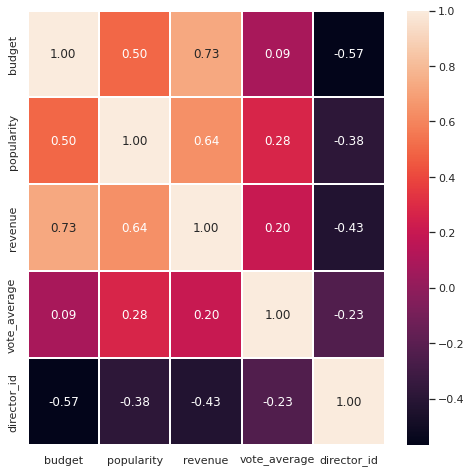

In [44]:
sns.set(rc = {'figure.figsize': (8,8)})
sns.heatmap(movies [ [ "budget" , "popularity", "revenue" , "vote_average" , "director_id"]].corr() , annot = True , fmt = ".2f" , linewidth = 1)

List out the director names with number of movies and revenue


In [45]:
cur.execute('SELECT name, COUNT(original_title), SUM(revenue)FROM directors JOIN movies ON directors.id = movies.director_id GROUP BY name ORDER BY SUM(revenue) DESC')
mostProfitableDirector = cur.fetchall()
mostProfitableDirector = pd.DataFrame(mostProfitableDirector, columns = ['director_name', 'movies', 'revenue'])
mostProfitableDirector.head(10)

,director_name,movies,revenue
0,Steven Spielberg,27,9147393164
1,Peter Jackson,9,6498642820
2,James Cameron,7,5883569439
3,Michael Bay,12,5832524638
4,Christopher Nolan,8,4227483234
5,Chris Columbus,11,3725631503
6,Robert Zemeckis,13,3590622002
7,George Lucas,5,3339113893
8,Tim Burton,14,3337418241
9,Ridley Scott,16,3189557997


Display all the number of movies for particular director and revenue .

In [46]:
cur.execute('SELECT name, COUNT(original_title), SUM(revenue) FROM directors JOIN movies ON directors.id = movies.director_id GROUP BY name ORDER BY COUNT(original_title) DESC')
mostProductiveDirector = cur.fetchall()
mostProductiveDirector = pd.DataFrame(mostProductiveDirector, columns = ['director_name', 'movies', 'revenue'])
mostProductiveDirector.head(10)

,director_name,movies,revenue
0,Steven Spielberg,27,9147393164
1,Woody Allen,21,669101038
2,Clint Eastwood,20,2512058888
3,Martin Scorsese,20,1956635998
4,Ridley Scott,16,3189557997
5,Robert Rodriguez,16,1109899581
6,Spike Lee,16,340618771
7,Renny Harlin,15,1031500590
8,Steven Soderbergh,15,2114864443
9,Oliver Stone,14,1278048615


By doing Director analysis We know Steven Spielberg is the highest revenue, so list the Steven Spielberg movies info

In [47]:
 
cur.execute('SELECT original_title, release_date, budget, revenue, popularity, vote_average FROM directors JOIN movies ON directors.id = movies.director_id WHERE name = "Steven Spielberg" ORDER BY release_date DESC')
moviesByStevenSpielberg = cur.fetchall()
moviesByStevenSpielberg = pd.DataFrame(moviesByStevenSpielberg, columns = ['original_title', 'release_date', 'budget', 'revenue', 'popularity', 'vote_average'])
moviesByStevenSpielberg

,original_title,release_date,budget,revenue,popularity,vote_average
0,The BFG,2016-06-01,140000000,183345589,44,6.0
1,Bridge of Spies,2015-10-15,40000000,165478348,48,7.2
2,Lincoln,2012-11-09,65000000,275293450,36,6.7
3,War Horse,2011-12-25,66000000,177584879,29,7.0
4,The Adventures of Tintin,2011-10-25,130000000,371940071,89,6.7
5,Indiana Jones and the Kingdom of the Crystal S...,2008-05-21,185000000,786636033,75,5.7
6,Munich,2005-12-22,70000000,130358911,29,6.9
7,War of the Worlds,2005-06-28,132000000,591739379,48,6.2
8,The Terminal,2004-06-17,60000000,219417255,57,7.0
9,Catch Me If You Can,2002-12-25,52000000,352114312,73,7.7
